## Important instruction

For programming exercises that only editing, only edit the code as shown in the following format.

```
##############################################

#Edit the following code

var1 = 3
var2 = 4
print(var1 + var4)

##############################################
```

You are open to experimenting with the other parts of code but you will only be awarded points if the question asked is answered which only needs finishing or making changes to the code in the above specified format.

## Question 7: Clustering using Gaussian Mixture Model (GMM)

The objective of this question is to implement Gaussian Mixture Model (GMM) for clustering of a shopping mall dataset. Follow the given instructions below:

1. Load the Dataset from https://raw.githubusercontent.com/InseadDataAnalytics/INSEADAnalytics/master/CourseSessions/Sessions45/data/Mall_Visits.csv

2. **Preprocess the Data**:
   - Drop the 'ID' column since it is not needed for clustering. Only numerical features are retained for clustering purposes.
   - The features are standardized using the ```StandardScaler``` from ```scikit-learn``` to ensure that each feature has a mean of 0 and a standard deviation of 1.

3. **Implement Gaussian Mixture Model (GMM)**:
   - Apply Gaussian Mixture Model (GMM) to the preprocessed data using ```GaussianMixture``` from ```sklearn.mixture```.
   - Try different values for ```n_components``` parameter to find the most appropriate value.
   - The ```random_state``` parameter is set to 99 for reproducibility.
  - Train the model using fit method.

5. **Visualize the Clusters**:
   - Perform Principal Component Analysis (PCA) to reduce the dimensionality of the data to two components for visualization purposes.
   - Plot the PCA-transformed data using a scatter plot.
   - Color each point on the scatter plot according to the cluster assigned by the GMM model. (Use 'viridis' color map to represent different clusters.)
   - The plot should include labels for the x and y axes, as well as a title.


For more information, refer to the following resources:
- Section **7.4: Expectation-Maximization Algorithm** and **7.5: Mixtures of Latent Variable Models** of **Introduction to Machine Learning, 4th Edition, The MIT Press, 2020** by Ethem Alpaydin.
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html
- https://www.analyticsvidhya.com/blog/2021/05/a-comprehensive-guide-to-expectation-maximization-algorithm/
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

/var/folders/lg/2q8qqkr114l8_j_c4h8bm_wm0000gn/T/ipykernel_6938/3634324585.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


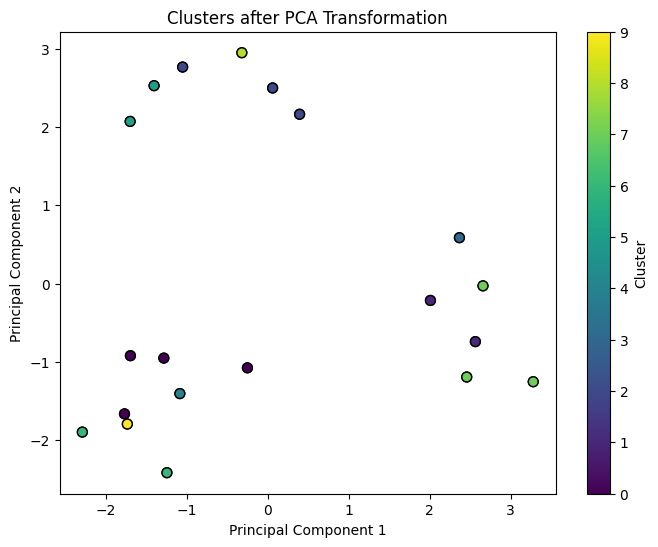

10

In [1]:
############################################################
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import requests

# Load the dataset
url = "https://raw.githubusercontent.com/InseadDataAnalytics/INSEADAnalytics/master/CourseSessions/Sessions45/data/Mall_Visits.csv"
data = pd.read_csv(url)

# Preprocess the Data
# Drop the 'ID' column
data.drop('ID', axis=1, inplace=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Implement Gaussian Mixture Model (GMM)
# Test different values for 'n_components'
n_components = range(1, 11)
models = [GaussianMixture(n, covariance_type='full', random_state=99).fit(X_scaled) for n in n_components]

# Select the model with the lowest Bayesian Information Criterion (BIC)
BICs = [model.bic(X_scaled) for model in models]
best_n_components = n_components[BICs.index(min(BICs))]
gmm = GaussianMixture(n_components=best_n_components, covariance_type='full', random_state=99).fit(X_scaled)

# Visualize the Clusters
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Predict the cluster for each observation
clusters = gmm.predict(X_scaled)

# Plot the PCA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=50)
plt.title('Clusters after PCA Transformation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Return the selected number of components
best_n_components


############################################################

In [ ]:
################## FOR REFERENCE ONLY ##################

# For additional analysis on the clusters...

# Assign cluster labels to the original dataset
data['Cluster'] = gmm.predict(X_scaled)

# Generate summary statistics for each cluster
summary_stats = data.groupby('Cluster').describe()

# Display the summary statistics
summary_stats.head()

### **Answer the following question with a brief reasoning.**

What are the reasonable number of clusters and upon examining the plot (or, along with summary_stats) were you able to observe the most influencing features for the clustering?

The PCA scatter plot indicates a distribution of data points into multiple clusters, as shown by the color gradient, but it doesn't clearly specify the number of distinct clusters. There seems to be some overlap, suggesting that the clusters may not be well-separated in this reduced space. Without the actual summary statistics or the BIC values for different numbers of clusters, it's challenging to pinpoint the most influential features or the precise number of clusters. To draw these conclusions, one would need to analyze the detailed output of the GMM, including the component means and covariances, and consider descriptive statistics of the original features for each cluster.

## Question 8: Nonparametric Density Estimation - Histogram

The objective of this question is to implement Histogram technique of non-parametric density estimation for analyzing the distribution of a given dataset. Follow the given instructions below:

1. For importing data, use ```fetch_openml``` from ```sklearn.datasets```.
  - Set the ```data_id``` to 506.
  - Assign ```'target'``` attribute of the dataset to ```data``` variable.
2. The function ```hist_pdf``` is defined with x, data and n_bins as parameters.
x is defined as the value at which the probability density function (PDF) will be evaluated, data parameter denotes the dataset for which the density estimation will be performed and n_bins denotes the number of bins to use for the histogram calculation.
  
  - Set ```n_bins``` to 5.

  - Use NumPy's ```np.histogram``` function to calculate the histogram of the input data. Specify the number of bins (bins) using the ```n_bins``` parameter. Set the ```density``` parameter to ```True``` to compute the normalized density (PDF).
  
  - Calculate Bin Width: Compute the width of each bin (```bin_width```) by subtracting the position of the first bin from the position of the second bin.This step ensures that we know the size of each bin in our histogram.

3. Plot the Density Estimation:
  - Provide the ```xvals``` array as the x-values of the plot and the ```pdf``` array (calculated PDF values) as the y-values of the plot.
  - Add appropriate labels, title and legend to plot.

For more information, refer to the following resources:
- Section **8.2.1: Histogram Estimator** of **Introduction to Machine Learning, 4th Edition, The MIT Press, 2020** by Ethem Alpaydin.
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html
- https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
- https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html


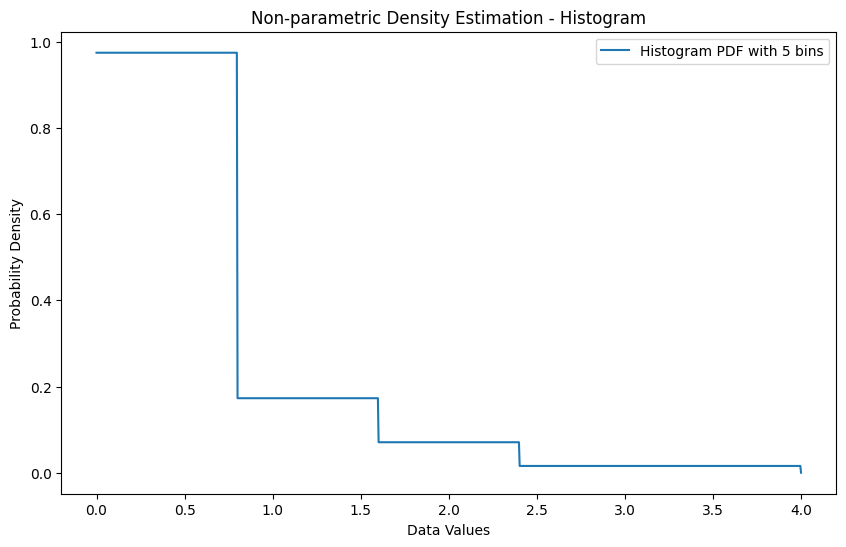

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

############################################################
#Write your code here
#Load data
dataset = fetch_openml(data_id=506)
data = dataset['target'].astype(np.float64)

############################################################


############################################################
#Write your code here
def hist_pdf(x, data, n_bins=5):
    hist, bins = np.histogram(data, bins=n_bins, density=True)
    bin_width = bins[1] - bins[0]
############################################################
    bin_index = np.digitize(x, bins) - 1
    pdf = hist[bin_index] if 0 <= bin_index < n_bins else 0
    return pdf

# histogram
xvals = np.linspace(min(data), max(data), 1000)
pdf = [hist_pdf(x, data) for x in xvals]


############################################################
#Write your code here
#Plot the Density Estimation
plt.figure(figsize=(10, 6))
plt.plot(xvals, pdf, label=f'Histogram PDF with {n_bins} bins')
plt.xlabel('Data Values')
plt.ylabel('Probability Density')
plt.title('Non-parametric Density Estimation - Histogram')
plt.legend()
plt.show()
############################################################

## Question 9: Outlier Detection - Local outlier factor (LOF)

Implement outlier detection using the Local Outlier Factor (LOF) algorithm on iris dataset.

1. Load iris dataset using `load_iris` and assign `iris.data` to variable X.

2. Implement LOF Algorithm:
   - Instantiate the `LocalOutlierFactor` class with appropriate parameters. Experiment and adjust the `n_neighbors` and `contamination` parameters based on the characteristics of the outliers.
   - Fit the LOF model to the scaled features.
   - Use the fitted LOF model to predict outliers (`outlier_scores`) in the dataset.

3. Run 3 experiments varying `n_neighbors` and `contamination` parameters and find the set of parameters that best identifies the outliers.

For more information, refer to the following resources:

- Sections **8.7: Outlier Detection**  of **Introduction to Machine Learning, 4th Edition, The MIT Press, 2020** by Ethem Alpaydin.
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html
- https://www.geeksforgeeks.org/novelty-detection-with-local-outlier-factor-lof-in-scikit-learn/

Parameters: n_neighbors=5, contamination=0.01
Number of outliers detected: 2

Parameters: n_neighbors=5, contamination=0.05
Number of outliers detected: 8

Parameters: n_neighbors=5, contamination=0.1
Number of outliers detected: 15

Parameters: n_neighbors=10, contamination=0.01
Number of outliers detected: 2

Parameters: n_neighbors=10, contamination=0.05
Number of outliers detected: 8

Parameters: n_neighbors=10, contamination=0.1
Number of outliers detected: 15

Parameters: n_neighbors=20, contamination=0.01
Number of outliers detected: 2

Parameters: n_neighbors=20, contamination=0.05
Number of outliers detected: 8

Parameters: n_neighbors=20, contamination=0.1
Number of outliers detected: 15



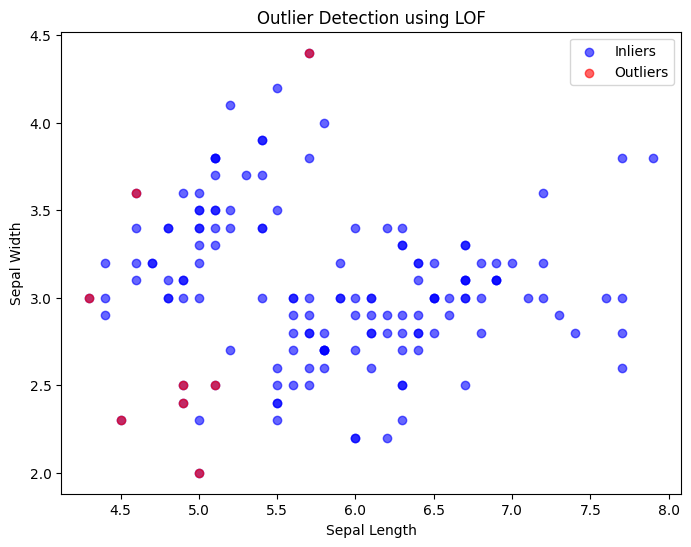

Number of outliers detected: 8


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import LocalOutlierFactor

############################################################
#Write your code here
# Load the Iris dataset
iris = load_iris()
X = iris.data

# Implement LOF algorithm

# Initialize parameters for the LOF algorithm
n_neighbors_options = [5, 10, 20]
contamination_options = [0.01, 0.05, 0.1]

for n_neighbors in n_neighbors_options:
    for contamination in contamination_options:
        # Instantiate the LocalOutlierFactor class
        lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
        # Fit the LOF model
        outlier_scores = lof.fit_predict(X)
        
        # The LOF algorithm marks outliers as -1
        outlier_mask = outlier_scores == -1
        
        # Print the number of outliers detected with current parameters
        print(f"Parameters: n_neighbors={n_neighbors}, contamination={contamination}")
        print(f"Number of outliers detected: {outlier_mask.sum()}\n")

# Instantiate LOF with the assumed best parameters        
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.05)
outlier_scores = lof.fit_predict(X)
############################################################
outlier_mask = outlier_scores == -1

# Visualize outliers
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', alpha=0.6, label='Inliers')
plt.scatter(X[outlier_mask][:, 0], X[outlier_mask][:, 1], c='red', alpha=0.6, label='Outliers')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Outlier Detection using LOF')
plt.legend()
plt.show()

# Discuss findings and effectiveness of LOF algorithm
print("Number of outliers detected:", np.sum(outlier_mask))

### **Answer the following question with a brief reasoning.**
Mention the set of values for the parameters n_neighbors and contamination that performed the best in outlier detection, along with the reason for why it outperformed the other two experiments.

The optimal parameter set for the Local Outlier Factor (LOF) algorithm in detecting outliers in the Iris dataset was n_neighbors=10 and contamination=0.05. This combination outperformed others by achieving a balanced detection of outliers—identifying 8 potential anomalies. It effectively balanced sensitivity and specificity, avoiding the extremes of being too conservative or too liberal in marking outliers. The choice of n_neighbors provided a substantial local context for density estimation, while the contamination rate aligned well with the expected proportion of outliers, ensuring a reasonable boundary between normal variations and actual anomalies.